In [103]:
import pandas as pd; import geopandas as gpd; import seaborn as sns
from shapely.geometry import Point;
import fiona, sys, json;
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.68108 -14.45336, -170.915..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((166.75626 19.26052, 166.62574 ..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-157.64424 -19.92979, -157.824..."


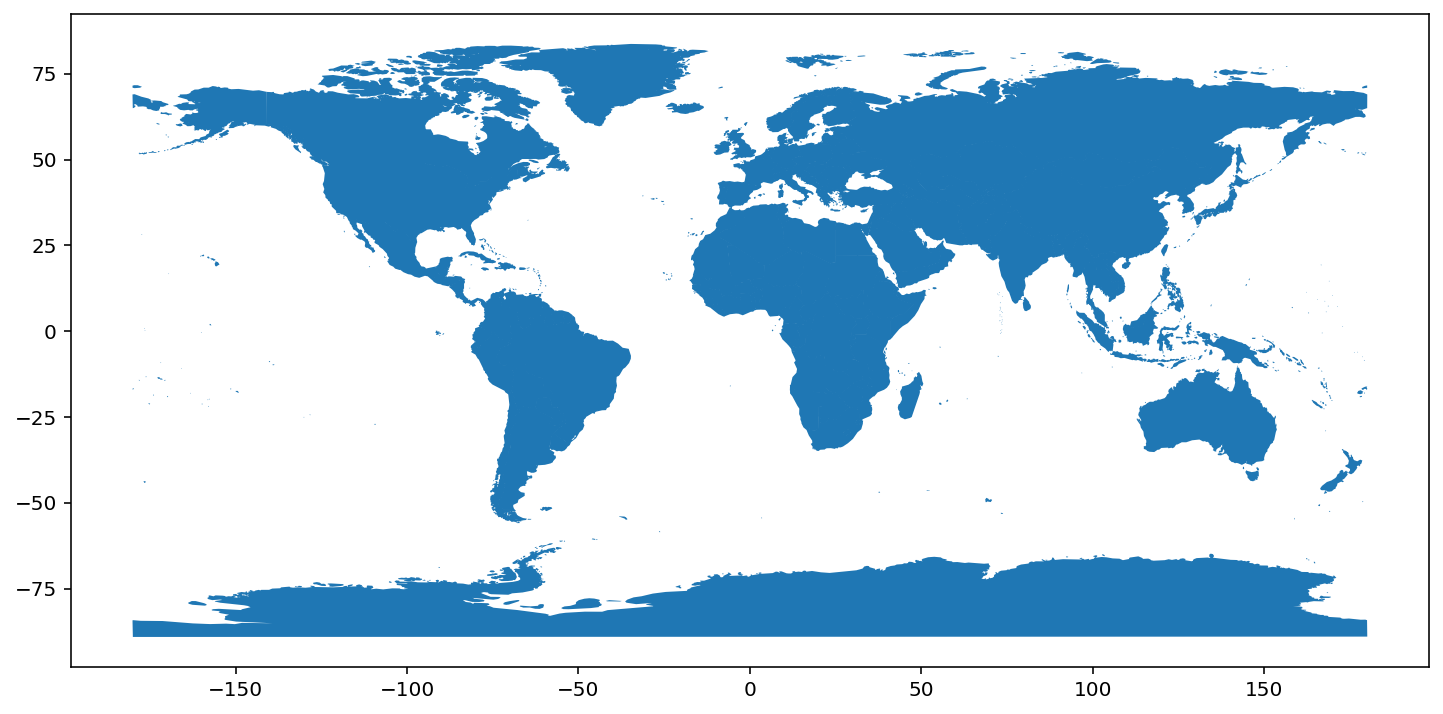

In [2]:
#First, read in a file that has Country Boundaries
countries = gpd.read_file('./data/country_outlines_simplified_2.geojson') #Simplified geometries; not exact.
countries.plot(figsize=(16,6))
countries.head(3)

In [92]:
africa_angl = ['Botswana','Burundi','Ghana','Kenya','Lesotho','Malawi','Liberia','Nigeria','Namibia','Rwanda',
               'Somalia','South Africa','South Sudan','Sudan','Tanzania','Uganda','Zambia', 'Swaziland']

In [93]:
africa_rom = ['Algeria','Angola','Cameroon','Congo','Congo DRC',"Côte d'Ivoire",'Guinea','Madagascar',
              'Mali','Morocco','Niger','Senegal','Sierra Leone','Togo']

In [98]:
africa_rom_plus = ['Mauritania','Benin','Burkina Faso','Chad','Gabon',
    'Central African Republic','Equatorial Guinea', 'Zimbabwe','Mozambique','Canarias']
africa_angl_plus = ['Ethiopia','Djibouti','Eritrea','Eswatini','Gambia',
                    'Guinea-Bissau','Tunisia','Libya','Egypt']

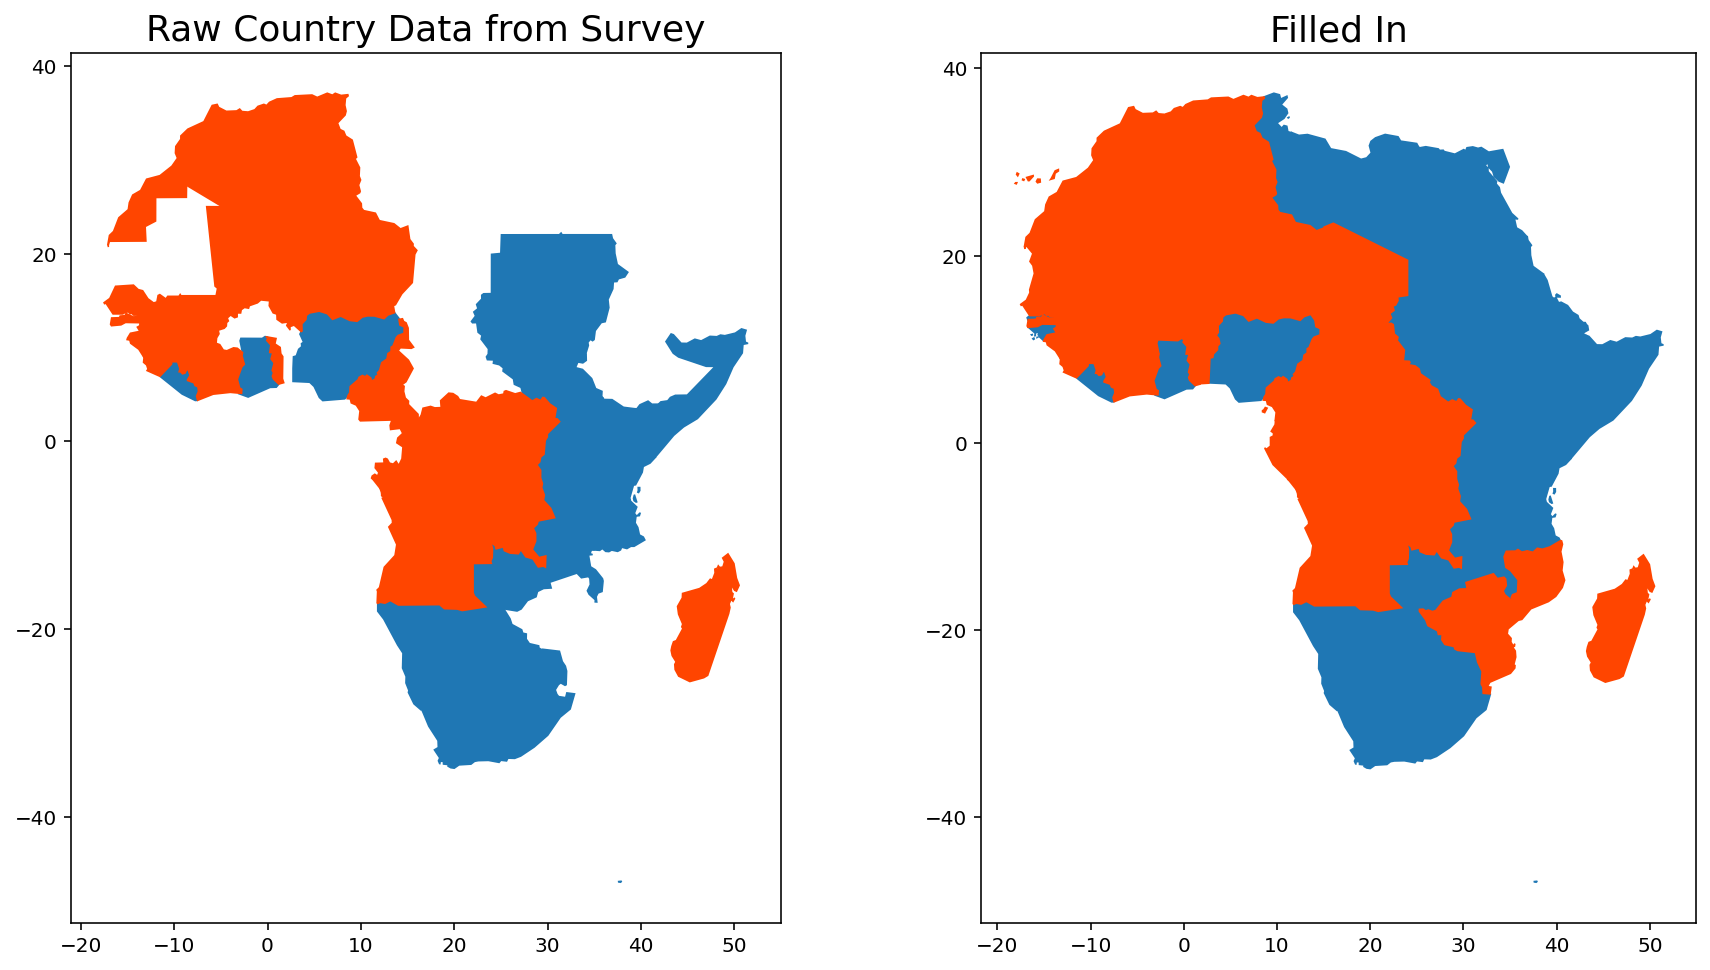

In [122]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
ax2, ax = axes[0],axes[1];
countries.set_index('COUNTRY').reindex(index=africa_angl+africa_angl_plus).plot(ax=ax)
countries.set_index('COUNTRY').reindex(index=africa_rom+africa_rom_plus).plot(ax=ax, color='orangered');
ax.set_title("Filled In", fontsize=18);

countries.set_index('COUNTRY').reindex(index=africa_angl).plot(ax=ax2, label="Africa-Rom")
countries.set_index('COUNTRY').reindex(index=africa_rom).plot(ax =ax2, color='orangered')
ax2.set_title("Raw Country Data from Survey", fontsize=18);